In [1]:
from data_process.ImageDataset import ImageDataset
from data_process.ImageDataset import label_map

training_data = ImageDataset('./data/resized')

label: 0 with 418 images, named as "cloth_mask"
label: 1 with 500 images, named as "no_face_mask"
label: 2 with 411 images, named as "surgical_mask"
label: 3 with 387 images, named as "n95_mask"
label: 4 with 168 images, named as "mask_worn_incorrectly"


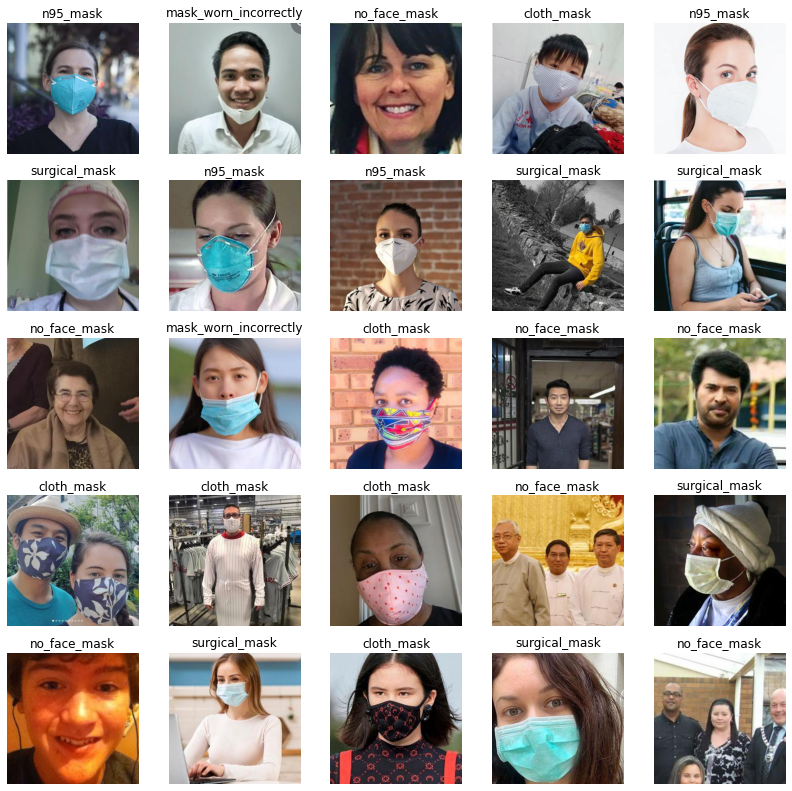

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def show_image_rand(img_data):
    figure = plt.figure(figsize=(14, 14))
    cols, rows = 5, 5
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(img_data), size=(1,)).item()
        img, label = img_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label_map[label])
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0))
    plt.show()
    
show_image_rand(training_data)

In [3]:
from torchvision import transforms
import PIL

transforms = torch.nn.Sequential(
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
)
scripted_transforms = torch.jit.script(transforms)

training_data_with_transform = ImageDataset('./data/resized', transform=scripted_transforms)
test_data_with_transform = ImageDataset('./data/resized', transform=scripted_transforms)


label: 0 with 418 images, named as "cloth_mask"
label: 1 with 500 images, named as "no_face_mask"
label: 2 with 411 images, named as "surgical_mask"
label: 3 with 387 images, named as "n95_mask"
label: 4 with 168 images, named as "mask_worn_incorrectly"
label: 0 with 418 images, named as "cloth_mask"
label: 1 with 500 images, named as "no_face_mask"
label: 2 with 411 images, named as "surgical_mask"
label: 3 with 387 images, named as "n95_mask"
label: 4 with 168 images, named as "mask_worn_incorrectly"


/Users/yinnnyou/miniconda3/envs/comp6721/lib/python3.6/site-packages/torchvision/transforms/transforms.py:1249: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data_with_transform, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data_with_transform, batch_size=64, shuffle=True)

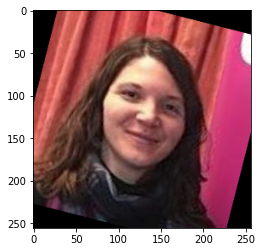

Label: 1


In [139]:
train_features, train_labels = train_dataloader.dataset[900]
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
img = train_features.squeeze()
label = train_labels
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")